In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import sys
sys.path.append('/content/drive/mypythondirectory')

In [4]:
import os
os.chdir("/content/drive/MyDrive/MTech_Project_Code/")
!ls

00000_00000.jpg  config.py    myData		 my_modelres.pt
00000_00001.jpg  data	      my_model_ores.pt	 my_modelres.pth
12.jpg		 evaluate.py  my_model_ores.pth  __pycache__
14.jpg		 GTSRB	      my_model_pres.pt	 runs
2.jpg		 labels.csv   my_model_pres.pth  Untitled.ipynb
31.jpg		 lib	      my_model.pt	 utils
36.jpg		 model	      my_model.pth


In [5]:
import torch
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from model.data_loader import val_data_loader, train_data_loader
from utils.device import device
from model.net import net
import config

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [6]:
net.to(device)
net.load_state_dict(torch.load(config.model_path))
net = net.eval()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


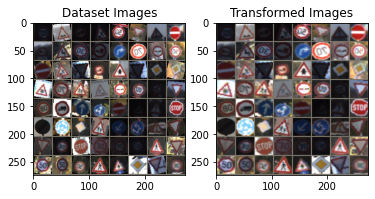

In [7]:
def convert_image_np(inp):
    """Convert a Tensor to numpy image."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    return inp

# We want to visualize the output of the spatial transformers layer
# after the training, we visualize a batch of input images and
# the corresponding transformed batch using STN.


def visualize_stn():
    with torch.no_grad():
        # Get a batch of training data
        data = next(iter(train_data_loader))[0].to(device)

        input_tensor = data.cpu()
        transformed_input_tensor = net.stn(data).cpu()

        in_grid = convert_image_np(
            torchvision.utils.make_grid(input_tensor))

        out_grid = convert_image_np(
            torchvision.utils.make_grid(transformed_input_tensor))

        # Plot the results side-by-side
        f, axarr = plt.subplots(1, 2)
        axarr[0].imshow(in_grid)
        axarr[0].set_title('Dataset Images')

        axarr[1].imshow(out_grid)
        axarr[1].set_title('Transformed Images')


# Visualize the STN transformation on some input batch
visualize_stn()

plt.ioff()
plt.show()
